<a href="https://colab.research.google.com/github/Nguyen379/Mask_detection/blob/main/ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd

'/content'

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection"

/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection'

In [ ]:
%ls

 Analyze_data.ipynb          masks_no_improper/     scores/
 combined_haar_model.ipynb   model_checkpoint/      ViT.ipynb
'Face Mask Dataset'/         Model_training.ipynb
 haarcascade/                Ref_image.png


In [ ]:
pip install transformers

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 48.2 MB/s 
     |████████████████████████████████| 61 kB 454 kB/s 
     |████████████████████████████████| 3.3 MB 40.5 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#Demo

In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

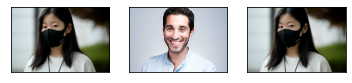

In [ ]:
from PIL import Image
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import urllib
# matplotlib requires RGB ordering whereas OpenCV (perversely) uses BGR

url = "https://res.cloudinary.com/atoms-shoes/image/upload/c_scale,w_1400,q_auto,f_auto/v1623798821/products/masks/everyday-face-mask/mask_lifestyle_1_bqshhy"
url2 = "https://www.headshotsprague.com/wp-content/uploads/2019/07/Headshots_Prague-emotional-portrait-of-a-smiling-entrepreneur-1.jpg"


plt.subplot(1, 3, 1)
resp = requests.get(url, stream=True).raw
img1 = np.asarray(bytearray(resp.read()), dtype="uint8")
img1 = cv2.imdecode(img1, cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
plt.xticks([])
plt.yticks([])
plt.imshow(img1)


plt.subplot(1, 3, 2)
url_response = urllib.request.urlopen(url2)
img2 = cv2.imdecode(np.array(bytearray(url_response.read()), dtype="uint8"), -1)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
plt.xticks([])
plt.yticks([])
plt.imshow(img2)


plt.subplot(1, 3, 3)
img3 = Image.open(requests.get(url, stream=True).raw)
plt.xticks([])
plt.yticks([])
plt.imshow(img3)

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=img1, return_tensors="pt")
# unpacking dictionary
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

Predicted class: mask


In [ ]:
print(type(inputs))
print(inputs.keys())
print(inputs.values())

<class 'transformers.feature_extraction_utils.BatchFeature'>
dict_keys(['pixel_values'])
dict_values([tensor([[[[ 0.4902,  0.4902,  0.4980,  ..., -0.9294, -0.9216, -0.9137],
          [ 0.4902,  0.4902,  0.4980,  ..., -0.9373, -0.9294, -0.9216],
          [ 0.4902,  0.4980,  0.5059,  ..., -0.9529, -0.9451, -0.9294],
          ...,
          [ 0.0039,  0.0039,  0.0196,  ..., -0.9922, -0.9922, -0.9922],
          [-0.0039,  0.0118,  0.0196,  ..., -0.9922, -0.9922, -0.9843],
          [-0.0118,  0.0039,  0.0118,  ..., -0.9922, -0.9922, -0.9922]],

         [[ 0.6078,  0.6078,  0.6157,  ..., -1.0000, -1.0000, -0.9922],
          [ 0.6078,  0.6078,  0.6157,  ..., -1.0000, -1.0000, -0.9843],
          [ 0.6078,  0.6157,  0.6235,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [ 0.0431,  0.0431,  0.0510,  ..., -0.9765, -0.9765, -0.9765],
          [ 0.0353,  0.0510,  0.0510,  ..., -0.9765, -0.9765, -0.9686],
          [ 0.0275,  0.0431,  0.0510,  ..., -0.9765, -0.9765, -0.9765]],



In [ ]:
print(inputs)

{'pixel_values': tensor([[[[ 0.4902,  0.4902,  0.4980,  ..., -0.9294, -0.9216, -0.9137],
          [ 0.4902,  0.4902,  0.4980,  ..., -0.9373, -0.9294, -0.9216],
          [ 0.4902,  0.4980,  0.5059,  ..., -0.9529, -0.9451, -0.9294],
          ...,
          [ 0.0039,  0.0039,  0.0196,  ..., -0.9922, -0.9922, -0.9922],
          [-0.0039,  0.0118,  0.0196,  ..., -0.9922, -0.9922, -0.9843],
          [-0.0118,  0.0039,  0.0118,  ..., -0.9922, -0.9922, -0.9922]],

         [[ 0.6078,  0.6078,  0.6157,  ..., -1.0000, -1.0000, -0.9922],
          [ 0.6078,  0.6078,  0.6157,  ..., -1.0000, -1.0000, -0.9843],
          [ 0.6078,  0.6157,  0.6235,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [ 0.0431,  0.0431,  0.0510,  ..., -0.9765, -0.9765, -0.9765],
          [ 0.0353,  0.0510,  0.0510,  ..., -0.9765, -0.9765, -0.9686],
          [ 0.0275,  0.0431,  0.0510,  ..., -0.9765, -0.9765, -0.9765]],

         [[ 0.6471,  0.6471,  0.6549,  ..., -0.9922, -0.9922, -1.0000],
          [ 0

In [ ]:
print(type(outputs))
print(outputs.keys())

<class 'transformers.modeling_outputs.SequenceClassifierOutput'>
odict_keys(['logits'])


In [ ]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import requests

url = "https://res.cloudinary.com/atoms-shoes/image/upload/c_scale,w_1400,q_auto,f_auto/v1623798821/products/masks/everyday-face-mask/mask_lifestyle_1_bqshhy"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
inputs = feature_extractor(images=image, return_tensors="pt")

outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

In [ ]:
print(type(outputs))
print(outputs.keys())
print(outputs["last_hidden_state"].shape)
print(outputs["pooler_output"].shape)

<class 'transformers.modeling_outputs.BaseModelOutputWithPooling'>
odict_keys(['last_hidden_state', 'pooler_output'])
torch.Size([1, 197, 768])
torch.Size([1, 768])


#DIY

In [ ]:
pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
import numpy as np 
import tensorflow
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
learning_rate = 1e-3
weight_decay=1e-4
batch_size= 128
num_epochs=25
image_size = 72
patch_size = 6
num_patches = (image_size//patch_size)**2
projection_dim = 64
num_heads = 4
transformer_units=[projection_dim*2, projection_dim]
transformer_layers = 8
mlp_head_units=[2048, 1024]

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import Sequential
num_classes = 100
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")
data_augmentation = Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)
print(x_train[0])

169017344/169001437 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x=layers.Dense(units, activation=tf.nn.gelu)(x)
        x=layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()

        self.patch_size=patch_size
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches=tf.image.extract_patches(
            images=images,
            sizes=[1,self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID")
        patch_dims=patches.shape[-1]
        # flatten patches 12x12 = 144
        patches=tf.reshape(patches, [batch_size,-1,patch_dims])
        return patches 

(32, 32, 3)
(1, 32, 32, 3)
(1, 72, 72, 3)
(1, 144, 108)


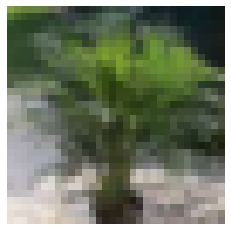

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
num_img = x_train.shape[0]
image = x_train[np.random.choice(range(num_img))]
print(image.shape)
plt.axis("off")
plt.imshow(image)

resized_image = tf.convert_to_tensor([image])
print(resized_image.shape)
resized_image = tf.image.resize(resized_image, size=(image_size, image_size))
print(resized_image.shape)
patches = Patches(patch_size)(resized_image)
print(patches.shape)

tf.Tensor(
[[129.       157.        76.       ...  40.243828  67.19135   32.503086]
 [102.22222  127.833336  60.38889  ...  43.20679   64.12654   40.330246]
 [100.77778  117.33333   71.27778  ...  47.580246  67.91358   48.824074]
 ...
 [123.43825  119.74689  115.1759   ... 143.38889  132.38889  130.38889 ]
 [143.0216   138.84259  134.37656  ... 141.6111   133.       123.6111  ]
 [199.03705  190.08951  184.76544  ... 131.       121.       116.      ]], shape=(144, 108), dtype=float32)


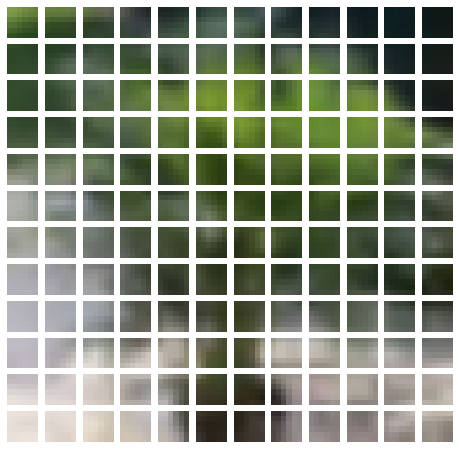

In [ ]:
pch_size = int(np.sqrt(patches.shape[1]))
pch_size
print(patches[0])
plt.figure(figsize=(8,8))
for idx, patch in enumerate(patches[0]):
    plt.subplot(pch_size, pch_size, idx+1)
    pch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(pch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
print(np.random.randint(0,32))

8


In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, 
                                                   output_dim=projection_dim)
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
positions = tf.range(start=0, limit=144, delta=1)
p = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)(positions)
print(positions)
print(p)
print(positions.shape)
print(p.shape)

tf.Tensor(
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143], shape=(144,), dtype=int32)
tf.Tensor(
[[-0.03578996  0.04004158 -0.04918922 ... -0.03820635 -0.04977008
  -0.01208465]
 [-0.01445828  0.02110063  0.03844223 ...  0.04497867  0.04403343
   0.04489856]
 [ 0.01614693 -0.00878644 -0.00140502 ... -0.04126668 -0.00526229
  -0.0089996 ]
 ...
 [ 0.00288118  0.04526575  0.04853806 ... -0.0100901  -0.0430741
   0.00085535]
 [ 0.0205774   0.01285173  0.01164558

In [ ]:
patches = Patches(patch_size)(resized_image)
ps = layers.Dense(units=projection_dim)(patches)
print(patches)
print(ps)
print(patches.shape)
print(ps.shape)


tf.Tensor(
[[[129.       157.        76.       ...  40.243828  67.19135   32.503086]
  [102.22222  127.833336  60.38889  ...  43.20679   64.12654   40.330246]
  [100.77778  117.33333   71.27778  ...  47.580246  67.91358   48.824074]
  ...
  [123.43825  119.74689  115.1759   ... 143.38889  132.38889  130.38889 ]
  [143.0216   138.84259  134.37656  ... 141.6111   133.       123.6111  ]
  [199.03705  190.08951  184.76544  ... 131.       121.       116.      ]]], shape=(1, 144, 108), dtype=float32)
tf.Tensor(
[[[ 135.98485    -180.47227     320.1299     ...  -14.984022
     49.87492    -159.37901   ]
  [ 120.75861    -146.78412     268.88934    ...   -0.61715347
     46.572647   -126.85646   ]
  [ 121.82456    -153.41115     261.5067     ...   -8.232744
     59.2816     -110.82574   ]
  ...
  [ 214.23875    -305.2471      404.40482    ... -118.04945
    189.5895     -104.062485  ]
  [ 252.75824    -362.19937     499.71982    ...  -89.05667
    177.40508    -165.82224   ]
  [ 268.7206     -

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output=layers.MultiHeadAttention(num_heads=num_heads,
                                                   key_dim=projection_dim,
                                                   dropout=0.1)(x1,x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        encoded_patches=layers.Add()([x2, x3])
    
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = layers.Dense(num_classes)(features)
    model= tensorflow.keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )
    model.compile(
        optimizer=optimizer,
        loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tensorflow.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tensorflow.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
    checkpoint_filepath = "model_checkpoint/VIT_cifar"
    checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
    
    history = model.fit(
            x=x_train,
            y=y_train,
            batch_size=batch_size,
            epochs=num_epochs,
            validation_split=0.1,
            callbacks=[checkpoint_callback],
        )
    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/25
352/352 [==============================] - 177s 463ms/step - loss: 4.4525 - accuracy: 0.0474 - top-5-accuracy: 0.1645 - val_loss: 3.8963 - val_accuracy: 0.1056 - val_top-5-accuracy: 0.3148
Epoch 2/25
352/352 [==============================] - 161s 457ms/step - loss: 3.9258 - accuracy: 0.0961 - top-5-accuracy: 0.2965 - val_loss: 3.5647 - val_accuracy: 0.1598 - val_top-5-accuracy: 0.4028
Epoch 3/25
352/352 [==============================] - 161s 457ms/step - loss: 3.6754 - accuracy: 0.1333 - top-5-accuracy: 0.3721 - val_loss: 3.3769 - val_accuracy: 0.1942 - val_top-5-accuracy: 0.4656
Epoch 4/25
352/352 [==============================] - 161s 458ms/step - loss: 3.5081 - accuracy: 0.1602 - top-5-accuracy: 0.4196 - val_loss: 3.2362 - val_accuracy: 0.2104 - val_top-5-accuracy: 0.4952
Epoch 5/25
352/352 [==============================] - 161s 457ms/step - loss: 3.3627 - accuracy: 0.1866 - top-5-accuracy: 0.4638 - val_loss: 3.0951 - val_accuracy: 0.2368 - val_top-5-accuracy: 0.5268


In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy/Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc", "train_loss", "val_loss"], loc="upper left")
    plt.show()

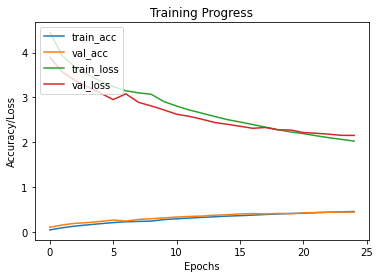

In [ ]:
import matplotlib.pyplot as plt
plot_hist(history)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Validation"
train_datagen = ImageDataGenerator(featurewise_center=True, 
                                   featurewise_std_normalization=True, 
                                   horizontal_flip=True, 
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir, 
                                                    target_size=(image_size,image_size),
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    shuffle=True)

val_datagen = ImageDataGenerator(featurewise_center=True, 
                                 featurewise_std_normalization=True)
val_generator = train_datagen.flow_from_directory(directory=val_dir,
                                                  target_size=(image_size,image_size), 
                                                  class_mode='categorical', 
                                                  batch_size=batch_size,
                                                  shuffle=True)

test_datagen = ImageDataGenerator(featurewise_center=True, 
                                  featurewise_std_normalization=True)
test_generator = train_datagen.flow_from_directory(directory=val_dir,
                                                   target_size=(image_size,image_size),
                                                   class_mode='categorical',
                                                   batch_size=batch_size,
                                                   shuffle=True)

Found 10040 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
x_train, y_train = next(train_generator)
print(x_train.shape)
print(len(train_generator))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(128, 72, 72, 3)
79


In [ ]:
from tqdm import tqdm

train_generator.reset()
x_train, y_train = next(train_generator)
for i in tqdm(range(len(train_generator)-1)):
  img, label = next(train_generator)
  x_train = np.append(x_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(x_train.shape, y_train.shape)

val_generator.reset()
x_val, y_val = next(val_generator)
for i in tqdm(range(len(val_generator)-1)): 
  img, label = next(val_generator)
  x_val = np.append(x_val, img, axis=0 )
  y_val = np.append(y_val, label, axis=0)
print(x_val.shape, y_val.shape)

test_generator.reset()
x_test, y_test = next(test_generator)
for i in tqdm(range(len(test_generator)-1)): 
  img, label = next(test_generator)
  x_test = np.append(x_test, img, axis=0)
  y_test = np.append(y_test, label, axis=0)
print(x_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
100%|██████████| 78/78 [15:55<00:00, 12.25s/it]


(10040, 72, 72, 3) (10040, 2)


100%|██████████| 6/6 [02:48<00:00, 28.08s/it]


(800, 72, 72, 3) (800, 2)


100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

(800, 72, 72, 3) (800, 2)


In [ ]:
def create_vit_classifier_IDG():    
    inputs = layers.Input(shape=(72,72,3))
    # augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(inputs)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output=layers.MultiHeadAttention(num_heads=num_heads,
                                                   key_dim=projection_dim,
                                                   dropout=0.1)(x1,x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        encoded_patches=layers.Add()([x2, x3])
    
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = layers.Dense(2)(features)
    model= tensorflow.keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
import time
def run_experiment_IDG(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )
    model.compile(
        optimizer=optimizer,
        loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[
            tensorflow.keras.metrics.BinaryAccuracy(name="accuracy"),
        ],
    )
    checkpoint_filepath = "model_checkpoint/VIT_mask"
    checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
    
    start = time.time()
    history = model.fit(
            x=x_train,
            y=y_train,
            batch_size=batch_size,
            epochs=num_epochs,
            validation_data=(x_val, y_val),
            callbacks=[checkpoint_callback],
        )
    total_time = time.time()-start
    model.load_weights(checkpoint_filepath)
    _, accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, total_time


vit_classifier = create_vit_classifier_IDG()
history, run_time = run_experiment_IDG(vit_classifier)
print(run_time)

Epoch 1/25
79/79 [==============================] - 51s 486ms/step - loss: 1.4015 - accuracy: 0.7303 - val_loss: 0.3434 - val_accuracy: 0.8644
Epoch 2/25
79/79 [==============================] - 37s 468ms/step - loss: 0.3613 - accuracy: 0.8511 - val_loss: 0.2909 - val_accuracy: 0.8881
Epoch 3/25
79/79 [==============================] - 37s 466ms/step - loss: 0.2958 - accuracy: 0.8835 - val_loss: 0.2628 - val_accuracy: 0.8900
Epoch 4/25
79/79 [==============================] - 37s 463ms/step - loss: 0.2549 - accuracy: 0.8984 - val_loss: 0.2079 - val_accuracy: 0.9137
Epoch 5/25
79/79 [==============================] - 37s 463ms/step - loss: 0.2201 - accuracy: 0.9125 - val_loss: 0.1845 - val_accuracy: 0.9237
Epoch 6/25
79/79 [==============================] - 37s 468ms/step - loss: 0.1818 - accuracy: 0.9318 - val_loss: 0.1722 - val_accuracy: 0.9294
Epoch 7/25
79/79 [==============================] - 37s 464ms/step - loss: 0.1582 - accuracy: 0.9415 - val_loss: 0.1466 - val_accuracy: 0.9431

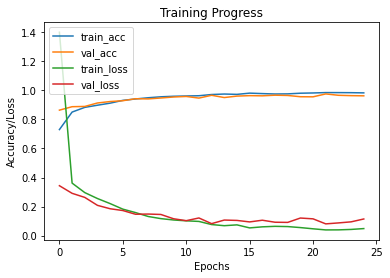

In [ ]:
import matplotlib.pyplot as plt
plot_hist(history)

# ViT finetune

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import time

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
# Data augmentation
train_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Validation"
train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                   horizontal_flip=True, 
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir, 
                                                    target_size=(224,224),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    shuffle=True)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,
                                                  target_size=(224,224), 
                                                  class_mode='categorical', 
                                                  batch_size=32,
                                                  shuffle=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,
                                                   target_size=(224,224),
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   shuffle=True)

Found 10040 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
!pip install --quiet vit-keras

from vit_keras import vit

In [ ]:
IMAGE_SIZE = 224
vit_model = vit.vit_b32(
        image_size = IMAGE_SIZE,
        activation = 'sigmoid',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)

353263616/353253686 [==============================] - 25s 0us/step


/usr/local/lib/python3.7/dist-packages/vit_keras/utils.py:83: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  UserWarning,


In [ ]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(2, 'sigmoid')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87455232  
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 batch_normalization (BatchN  (None, 768)              3072      
 ormalization)                                                   
                                                                 
 dense_41 (Dense)            (None, 4)                 3076      
                                                                 
 batch_normalization_1 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dense_42 (Dense)            (None, 2)          

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
patient = 4
save_path = "model_checkpoint/vit_keras.h5"
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-5,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_accuracy",
                    mode="max",
                    verbose=1,
                    save_best_only=True)
    ]

In [ ]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics ="accuracy")


In [ ]:
start = time.time()
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=20,
                    validation_data=val_generator,
                    callbacks=callbacks_list)

Epoch 1/20
314/314 [==============================] - ETA: 0s - loss: 0.4014 - accuracy: 0.8466
Epoch 00001: val_accuracy improved from -inf to 0.50125, saving model to model_checkpoint/vit_keras.h5
314/314 [==============================] - 289s 827ms/step - loss: 0.4014 - accuracy: 0.8466 - val_loss: 0.9113 - val_accuracy: 0.5013 - lr: 0.0010
Epoch 2/20
314/314 [==============================] - ETA: 0s - loss: 0.2778 - accuracy: 0.8943
Epoch 00002: val_accuracy improved from 0.50125 to 0.86625, saving model to model_checkpoint/vit_keras.h5
314/314 [==============================] - 275s 876ms/step - loss: 0.2778 - accuracy: 0.8943 - val_loss: 0.3730 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 3/20
314/314 [==============================] - ETA: 0s - loss: 0.2426 - accuracy: 0.9082
Epoch 00003: val_accuracy improved from 0.86625 to 0.89000, saving model to model_checkpoint/vit_keras.h5
314/314 [==============================] - 276s 866ms/step - loss: 0.2426 - accuracy: 0.9082 - val_lo

In [ ]:
total_time = time.time()-start
print(total_time)


1845.6568069458008


In [ ]:
import pickle
with open('scores/vit_keras.pkl', 'wb') as f:
  pickle.dump(history.history, f)

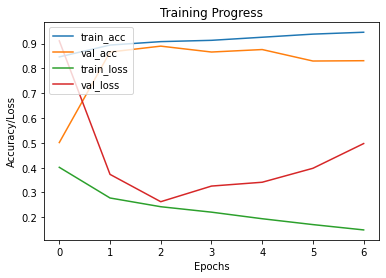

In [ ]:
import matplotlib.pyplot as plt
plot_hist(history)

In [ ]:
import matplotlib.pyplot as plt
plot_hist(history)